In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from catboost import CatBoostClassifier

import xgboost as xgb

from lightgbm import LGBMClassifier

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **Scatter Plot**

In [5]:
def PlotScatter(x, y, title, xunit, yunit, format_x, x_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    plt.scatter(x, y, alpha=0.7)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)
    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    if (format_x == 1):
        plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)
    plt.show()
    plt.close()

## **Box Plot**

In [7]:
def PlotBoxPlot(df_x, df_y, title, yunit):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel("", fontsize = 1)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.show()
    plt.close()

In [8]:
def PlotBoxPlotV2(df_x, df_y, title, yunit, size_x, size_y):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel("", fontsize = 1)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.gcf().set_size_inches(size_x, size_y)

    plt.show()
    plt.close()

## **Regression Plot**

In [10]:
def PlotRegPlot(df_x, df_y, title, xunit, yunit):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    plt.show()
    plt.close()

## **Histogram**

In [12]:
def HistPlot(x, title, xunit, x_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.histplot(x = x)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(0.98, -0.08)

    plt.ylabel("Count")

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)

    plt.show()
    plt.close()

## **CountPlot**

In [14]:
def CountPlot(x, title, x_size, y_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.countplot(x = x)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")
    
    plt.ylabel("Count")
    plt.xlabel("")
    
    plt.gcf().set_size_inches(x_size, y_size)

    plt.show()
    plt.close()

## **Predicted vs Actual Values**

In [16]:
def PlotFitted(y_test, yhat, title):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")
    
    plt.title(title)

    y_test1 = np.exp(y_test)
    yhat1 = np.exp(yhat)

    sns.scatterplot(x=y_test1.to_numpy().flatten(), y=yhat1, alpha=0.6)
    plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--')

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")
    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

    plt.gcf().set_size_inches(7, 5)

    plt.ylim(0,)
    plt.xlim(0,)
    
    plt.show()
    plt.close()
    
    
    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

In [17]:
def PlotFittedV(yhat, y_test, model, x_data, y_data, title, xlabel):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)

    ax2 = sns.distplot(y_test, hist=False, color="r", label = "Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Predicted Value", ax = ax2)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.ylabel("Density")
    plt.xlabel(xlabel)
    plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

    plt.gcf().set_size_inches(7, 5)

    plt.show()
    plt.close()

    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))
    print("- Cross-Validation Score:", cross_val_score(model, x_data, y_data, cv=5).mean())

In [18]:
def PlotFittedV2(yhat, y_test, title, xlabel):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)

    ax2 = sns.distplot(np.exp(y_test), hist=False, color="r", label = "Actual Value")
    sns.distplot(np.exp(yhat), hist=False, color="b", label="Predicted Value", ax = ax2)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.ylabel("Density")
    plt.xlabel(xlabel)
    plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

    plt.gcf().set_size_inches(7, 5)

    plt.show()
    plt.close()

    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

## **Line Plot**

In [20]:
def PlotLine(y, title, yunit, x_size, y_size):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  plt.plot(y)

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_xlabel("", fontsize = 0)
  #plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(x_size, y_size)

  plt.show()
  plt.close()

## **K-Fold Target Encoding**

In [22]:
def KFTE(df, df_test, categ_f, target):
  kf = KFold(n_splits = 5, shuffle = True, random_state = 13)

  nome = categ_f + "_E"

  df[nome] = 0.0

  for train_idx, val_idx in kf.split(df):
      fold_train = df.iloc[train_idx]
      fold_valid  = df.iloc[val_idx]

      medias_feature = fold_train.groupby(categ_f)[target].mean()
      media_global = fold_train[target].mean()

      feature_encoded = fold_valid[categ_f].map(medias_feature).fillna(media_global)
      df.loc[val_idx, nome] = feature_encoded

  mapping = df.groupby(categ_f)[target].mean().to_dict()
  global_mean = df[target].mean()

  df_test[categ_f] = df_test[categ_f].map(mapping).fillna(global_mean)

# **DATASET LOADING**

In [24]:
df = pd.read_csv("../data/processed/1.Data_Cleaning_train.csv")
df_test = pd.read_csv("../data/processed/1.Data_Cleaning_test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765


# **EXPLORATORY DATA ANALYSIS**

## **ENCODING**

### **Pclass**

In [28]:
df['Pclass_1'] = df['Pclass'].map({1: 1}).fillna(0)
df['Pclass_2'] = df['Pclass'].map({2: 1}).fillna(0)
df['Pclass_3'] = df['Pclass'].map({3: 1}).fillna(0)

df_test['Pclass_1'] =  df_test['Pclass'].map({1: 1}).fillna(0)
df_test['Pclass_2'] =  df_test['Pclass'].map({2: 1}).fillna(0)
df_test['Pclass_3'] =  df_test['Pclass'].map({3: 1}).fillna(0)

In [29]:
KFTE(df, df_test, 'Pclass', 'Survived')

### **Sex**

In [31]:
df['IsMale'] = df['Sex'].map({'male': 1}).fillna(0)

df_test['IsMale'] = df_test['Sex'].map({'male': 1}).fillna(0)

### **Embarked**

In [33]:
df['Embarked_C'] = df['Embarked'].map({"C": 1}).fillna(0)
df['Embarked_Q'] = df['Embarked'].map({"Q": 1}).fillna(0)
df['Embarked_S'] = df['Embarked'].map({"S": 1}).fillna(0)

df_test['Embarked_C'] =  df_test['Embarked'].map({"C": 1}).fillna(0)
df_test['Embarked_Q'] =  df_test['Embarked'].map({"Q": 1}).fillna(0)
df_test['Embarked_S'] =  df_test['Embarked'].map({"S": 1}).fillna(0)

In [34]:
KFTE(df, df_test, 'Embarked', 'Survived')

## **FEATURE ENGINEERING**

### **IsAgeEstimated**

In [37]:
df.loc[((df.Age > 1) & ((df.Age % 1) != 0)), ['IsAgeEstimated']] = 1
df['IsAgeEstimated'] = df['IsAgeEstimated'].fillna(0)

df_test.loc[((df_test.Age > 1) & ((df_test.Age % 1) != 0)), ['IsAgeEstimated']] = 1
df_test['IsAgeEstimated'] = df_test['IsAgeEstimated'].fillna(0)

### **Stage**

In [39]:
df.loc[(df.Age < 1), ['Stage']] = "Baby"
df.loc[((df.Age > 1) & (df.Age < 12)), ['Stage']] = "Child"
df.loc[((df.Age > 12) & (df.Age < 18)), ['Stage']] = "Teenager"
df.loc[(df.Age > 18), ['Stage']] = "Adult"
df.loc[(df.Age > 60), ['Stage']] = "Senior"

df_test.loc[(df_test.Age < 1), ['Stage']] = "Baby"
df_test.loc[((df_test.Age > 1) & (df_test.Age < 12)), ['Stage']] = "Child"
df_test.loc[((df_test.Age > 12) & (df_test.Age < 18)), ['Stage']] = "Teenager"
df_test.loc[(df_test.Age > 18), ['Stage']] = "Adult"
df_test.loc[(df_test.Age > 60), ['Stage']] = "Senior"

In [40]:
KFTE(df, df_test, 'Stage', 'Survived')

### **FreeFare**

In [42]:
df['FreeFare'] = df['Fare'].map({0: 1}).fillna(0)

df_test['FreeFare'] = df_test['Fare'].map({0: 1}).fillna(0)

### **IsSingle**

In [44]:
df.loc[(((df.Name.str.contains("Miss", na=False) == True) & (df.Age > 18))\
        | ((df.Sex == 'male') & (df.SibSp == 0) & (df.Age > 18))), ['IsSingle']] = 1
df['IsSingle'] = df['IsSingle'].fillna(0)


df_test.loc[(((df_test.Name.str.contains("Miss", na=False) == True) & (df_test.Age > 18))\
        | ((df_test.Sex == 'male') & (df_test.SibSp == 0) & (df_test.Age > 18))), ['IsSingle']] = 1
df_test['IsSingle'] = df_test['IsSingle'].fillna(0)

### **FarePerPerson**

In [46]:
df['FarePerPerson'] = df['Fare'] / df.groupby('Ticket').Ticket.transform('count')

df_test['FarePerPerson'] = df_test['Fare'] / df_test.groupby('Ticket').Ticket.transform('count')

### **FamilySize**

In [48]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

### **IsAlone**

In [50]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df_test['IsAlone'] = (df_test['FamilySize'] == 1).astype(int)

### **Title**

In [52]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
df['Title'].value_counts(normalize=True) * 100

Title
Mr          58.024691
Miss        20.426487
Mrs         14.029181
Master       4.489338
Dr           0.785634
Rev          0.673401
Mlle         0.224467
Major        0.224467
Col          0.224467
Countess     0.112233
Capt         0.112233
Ms           0.112233
Sir          0.112233
Lady         0.112233
Mme          0.112233
Don          0.112233
Jonkheer     0.112233
Name: proportion, dtype: float64

In [53]:
df['Title'] = df['Title'].map({"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs"}).fillna("Other")

df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
df_test['Title'] = df_test['Title'].map({"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs"}).fillna("Other")

KFTE(df, df_test, 'Title', 'Survived')

### **Deck**

In [55]:
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].fillna('U')

df_test['Deck'] = df_test['Cabin'].str[0]
df_test['Deck'] = df_test['Deck'].fillna('U')

KFTE(df, df_test, 'Deck', 'Survived')

### **HasCabin**

In [57]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

df_test['HasCabin'] = df_test['Cabin'].notnull().astype(int)

## **TARGET VARIABLE ANALYSIS**

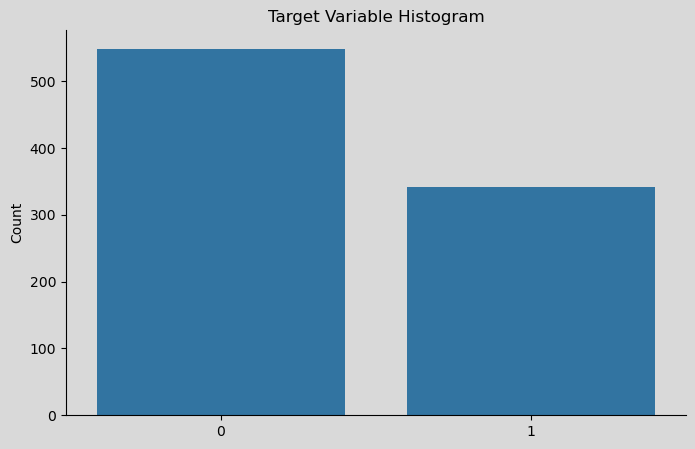

In [59]:
CountPlot(df['Survived'], "Target Variable Histogram", 8, 5)

## **NORMALIZATION**

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,Pclass_1,Pclass_2,Pclass_3,Pclass_E,IsMale,Embarked_C,Embarked_Q,Embarked_S,Embarked_E,IsAgeEstimated,Stage,Stage_E,FreeFare,IsSingle,FarePerPerson,FamilySize,IsAlone,Title,Title_E,Deck,Deck_E,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213,0.0,0.0,1.0,0.251948,1.0,0.0,0.0,1.0,0.339114,0.0,Adult,0.370884,0.0,0.0,7.2500,2,0,Mr,0.167866,U,0.302198,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,1.0,0.0,0.0,0.652439,0.0,1.0,0.0,0.0,0.592000,0.0,Adult,0.369863,0.0,0.0,71.2833,2,0,Mrs,0.790000,C,0.577778,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856,0.0,0.0,1.0,0.245478,0.0,0.0,0.0,1.0,0.339250,0.0,Adult,0.363946,0.0,1.0,7.9250,1,1,Miss,0.720280,U,0.298535,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,1.0,0.0,0.0,0.620112,0.0,0.0,0.0,1.0,0.339250,0.0,Adult,0.363946,0.0,0.0,26.5500,2,0,Mrs,0.801980,C,0.600000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765,0.0,0.0,1.0,0.251948,1.0,0.0,0.0,1.0,0.339114,0.0,Adult,0.370884,0.0,1.0,8.0500,1,1,Mr,0.167866,U,0.302198,0


## **CORRELATION**

In [75]:
columns1 = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass_1', 'Pclass_2',
           'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Stage', 'Title', 'Deck']

x_data = df.drop(columns = columns1, axis = 1).copy()
y_data = df[['Survived']].copy()

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=13)

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
yhat1 = gbc.predict(x_test)

cbc = CatBoostClassifier(verbose = 0)
cbc.fit(x_train, y_train)
yhat2 = cbc.predict(x_test)

xgbc = xgb.XGBClassifier()
xgbc.fit(x_train, y_train)
yhat3 = xgbc.predict(x_test)

lgbm = LGBMClassifier(verbose = -1)
lgbm.fit(x_train, y_train)
yhat4 = lgbm.predict(x_test)

print("GradientBoostingClassifier:", accuracy_score(y_test, yhat1))
print("CatBoostClassifier:", accuracy_score(y_test, yhat2))
print("XGBoostClassifier:", accuracy_score(y_test, yhat3))
print("LightGBMClassifier:", accuracy_score(y_test, yhat4), "\n")

GradientBoostingClassifier: 0.8134328358208955
CatBoostClassifier: 0.8171641791044776
XGBoostClassifier: 0.8208955223880597
LightGBMClassifier: 0.8171641791044776 



In [77]:
columns2 = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass_E',
           'Embarked_E', 'Stage', 'Title', 'Deck']

x_data2 = df.drop(columns = columns2, axis = 1).copy()
y_data2 = df[['Survived']].copy()

x_train, x_test, y_train, y_test = train_test_split(x_data2, y_data2, test_size=0.30, random_state=13)

gbc2 = GradientBoostingClassifier()
gbc2.fit(x_train, y_train)
yhat1 = gbc2.predict(x_test)

cbc2 = CatBoostClassifier(verbose = 0)
cbc2.fit(x_train, y_train)
yhat2 = cbc2.predict(x_test)

xgbc2 = xgb.XGBClassifier()
xgbc2.fit(x_train, y_train)
yhat3 = xgbc2.predict(x_test)

lgbm2 = LGBMClassifier(verbose = -1)
lgbm2.fit(x_train, y_train)
yhat4 = lgbm2.predict(x_test)

print("GradientBoostingClassifier:", accuracy_score(y_test, yhat1))
print("CatBoostClassifier:", accuracy_score(y_test, yhat2))
print("XGBoostClassifier:", accuracy_score(y_test, yhat3))
print("LightGBMClassifier:", accuracy_score(y_test, yhat4), "\n")

GradientBoostingClassifier: 0.8134328358208955
CatBoostClassifier: 0.8134328358208955
XGBoostClassifier: 0.8246268656716418
LightGBMClassifier: 0.8059701492537313 



In [78]:
feature_importances = pd.DataFrame({'Feature': x_data.columns,
                                    'GBC_Importance': gbc.feature_importances_,
                                    'CBC_Importance': cbc.feature_importances_,
                                    'LGBMC_Importance': lgbm.feature_importances_
                                   })
feature_importances = feature_importances.sort_values(by='GBC_Importance', ascending=False)

feature_importances

,Feature,GBC_Importance,CBC_Importance,LGBMC_Importance
6,IsMale,2.662573e-01,14.870854,44
15,Title_E,1.930430e-01,16.082753,170
12,FarePerPerson,9.931361e-02,9.868254,391
0,Age,9.526372e-02,11.488434,571
5,Pclass_E,8.575582e-02,8.364480,173
1,SibSp,6.060339e-02,3.193308,49
4,Fare_log,4.421824e-02,5.478221,0
16,Deck_E,4.246418e-02,6.192484,157
13,FamilySize,3.965670e-02,3.145980,26
7,Embarked_E,3.858251e-02,5.085242,191


In [83]:
feature_importances = pd.DataFrame({'Feature': x_data2.columns,
                                    'XGBC_Importance': xgbc2.feature_importances_,
                                   })
feature_importances = feature_importances.sort_values(by='XGBC_Importance', ascending=False)

feature_importances

,Feature,XGBC_Importance
19,Title_E,0.193001
7,Pclass_3,0.186448
1,SibSp,0.125590
17,FamilySize,0.095521
8,IsMale,0.068654
15,IsSingle,0.050555
11,Embarked_S,0.039733
20,Deck_E,0.037599
16,FarePerPerson,0.037236
0,Age,0.030753


In [143]:
features_gbc = ['IsMale', 'Title_E', 'FarePerPerson', 'Age', 'Pclass_E', 'SibSp', 'Fare_log', 'Deck_E', 'FamilySize', 'Embarked_E', 'Fare', 'Stage_E',
                'Parch']


x_data_gbc = df[features_gbc].copy()

x_train_gbc, x_test_gbc, _, _ = train_test_split(x_data_gbc, y_data, test_size=0.30, random_state=13)

gbc = GradientBoostingClassifier(random_state = 13)
gbc.fit(x_train_gbc, y_train)
yhat = gbc.predict(x_test_gbc)

print("XGBoostClassifier:", accuracy_score(y_test, yhat), "\n")

XGBoostClassifier: 0.8283582089552238 



In [157]:
features_cbc = ['Title_E', 'IsMale', 'Age', 'FarePerPerson', 'Pclass_E', 'Deck_E', 'Fare', 'Fare_log', 'Embarked_E', 'SibSp', 'Stage_E', 'FamilySize',
                'IsSingle', 'HasCabin']


x_data_cbc = df[features_cbc].copy()

x_train_cbc, x_test_cbc, _, _ = train_test_split(x_data_cbc, y_data, test_size=0.30, random_state=13)

cbc = CatBoostClassifier(verbose = 0, random_state = 13)
cbc.fit(x_train_cbc, y_train)
yhat = cbc.predict(x_test_cbc)

print("CatBoostClassifier:", accuracy_score(y_test, yhat), "\n")

CatBoostClassifier: 0.8208955223880597 



In [167]:
features_lgbmc = ['Age', 'Fare', 'FarePerPerson', 'Embarked_E', 'Pclass_E', 'Title_E', 'Deck_E', 'Stage_E', 'SibSp', 'IsSingle', 'IsMale', 'Parch',
                  'FamilySize', 'IsAgeEstimated']


x_data_lgbmc = df[features_lgbmc].copy()

x_train_lgbmc, x_test_lgbmc, _, _ = train_test_split(x_data_lgbmc, y_data, test_size=0.30, random_state=13)

lgbm = LGBMClassifier(verbose = -1, random_state=13)
lgbm.fit(x_train_lgbmc, y_train)
yhat = lgbm.predict(x_test_lgbmc)

print("LightGBMClassifier:", accuracy_score(y_test, yhat), "\n")

LightGBMClassifier: 0.8171641791044776 



In [145]:
features_xbgc = ['Title_E', 'Pclass_3', 'SibSp', 'FamilySize', 'IsMale', 'IsSingle', 'Embarked_S', 'Deck_E', 'FarePerPerson', 'Age', 'Stage_E', 'Embarked_C',
                 'Fare', 'Parch']


x_data_xbgc = df[features_xbgc].copy()
y_data = df[['Survived']].copy()

x_train_xbgc, x_test_xbgc, y_train, y_test = train_test_split(x_data_xbgc, y_data, test_size=0.30, random_state=13)

xgbc = xgb.XGBClassifier()
xgbc.fit(x_train_xbgc, y_train)
yhat = xgbc.predict(x_test_xbgc)

print("XGBoostClassifier:", accuracy_score(y_test, yhat), "\n")

XGBoostClassifier: 0.8395522388059702 



# **SAVING PROCESSED DATASET**

In [186]:
features = {"features_gbc": features_gbc, "features_cbc": features_cbc, "features_lgbmc": features_lgbmc,
            "features_xbgc": features_xbgc}

features = pd.DataFrame.from_dict(features, orient = 'columns')

features.to_csv('../data/processed/2.EDA_features', index = False)

ValueError: All arrays must be of the same length

In [184]:
features.to_csv('../data/processed/2.EDA_features', index = False)

AttributeError: 'dict' object has no attribute 'to_csv'

In [ ]:
df.to_csv('../data/processed/2.EDA_train_features_gbc.csv', index = False)
df.to_csv('../data/processed/2.EDA_train_x_data_cbc.csv', index = False)
df.to_csv('../data/processed/2.EDA_train_x_data_lgbm.csv', index = False)
df.to_csv('../data/processed/2.EDA_train_x_data_xbgc.csv', index = False)
df.to_csv('../data/processed/2.EDA_train_y_data.csv', index = False)

df_test.to_csv('../data/processed/1.Data_Cleaning_test.csv', index = False)